In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
df=pd.read_csv(r"C:\Users\MUHAMMADNOUMAN NAZIR\Desktop\kz.csv")
print(df.head())

                event_time             order_id           product_id  \
0  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
1  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
2  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
3  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
4  2020-04-24 19:16:21 UTC  2294584263154074236  2273948316817424439   

    category_id                category_code    brand   price       user_id  
0  2.268105e+18           electronics.tablet  samsung  162.01  1.515916e+18  
1  2.268105e+18           electronics.tablet  samsung  162.01  1.515916e+18  
2  2.268105e+18  electronics.audio.headphone   huawei   77.52  1.515916e+18  
3  2.268105e+18  electronics.audio.headphone   huawei   77.52  1.515916e+18  
4  2.268105e+18                          NaN  karcher  217.57  1.515916e+18  


In [4]:
print(df.info)



<bound method DataFrame.info of                       event_time             order_id           product_id  \
0        2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
1        2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
2        2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
3        2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
4        2020-04-24 19:16:21 UTC  2294584263154074236  2273948316817424439   
...                          ...                  ...                  ...   
2633516  2020-11-21 10:10:01 UTC  2388440981134693942  1515966223526602848   
2633517  2020-11-21 10:10:13 UTC  2388440981134693943  1515966223509089282   
2633518  2020-11-21 10:10:30 UTC  2388440981134693944  1515966223509089917   
2633519  2020-11-21 10:10:30 UTC  2388440981134693944  2273948184839454837   
2633520  2020-11-21 10:10:30 UTC  2388440981134693944  1515966223509127566   

          category_id          

In [4]:
print(df.columns)

Index(['event_time', 'order_id', 'product_id', 'category_id', 'category_code',
       'brand', 'price', 'user_id'],
      dtype='object')


In [5]:
print(df.isnull().sum())

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64


In [6]:
print((df.dtypes))

event_time        object
order_id           int64
product_id         int64
category_id      float64
category_code     object
brand             object
price            float64
user_id          float64
dtype: object


In [5]:
df = df[df.event_time>'2019']
df=df.sort_values('event_time')
df = df.dropna(subset=['category_code'])
##drop duplicate values
df = df.drop_duplicates()
##delete all category code contains number
df=df[~df["category_code"].str.contains('\d')]


#modify time
df[['Date','Time',"Zone"]] = df.event_time.str.split(" ",expand=True,)
df['Date']= pd.to_datetime(df['Date'])
del df['event_time']

In [8]:
df.head()

,order_id,product_id,category_id,category_code,brand,price,user_id,Date,Time,Zone
65680,2348710074727268400,1515966223509127455,2.268105e+18,appliances.personal.scales,scarlett,11.55,NaN,2020-01-05,03:26:46,UTC
58798,2348709315935732317,1515966223509089598,2.268105e+18,electronics.smartphone,huawei,138.63,NaN,2020-01-05,03:43:28,UTC
60541,2348709500518662599,1515966223509089470,2.268105e+18,computers.network.router,tp-link,27.75,NaN,2020-01-05,03:44:12,UTC
60956,2348709552796467879,2273948231689830404,2.268105e+18,appliances.kitchen.hood,jetair,150.44,NaN,2020-01-05,03:51:12,UTC
68638,2348710412486181349,1515966223509118542,2.268105e+18,electronics.telephone,nokia,22.89,NaN,2020-01-05,03:56:46,UTC


In [9]:
df.tail()

,order_id,product_id,category_id,category_code,brand,price,user_id,Date,Time,Zone
2633515,2388440981134693941,1515966223509088622,2.374499e+18,electronics.video.tv,lg,370.35,1.515916e+18,2020-11-21,10:08:54,UTC
2633516,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,2020-11-21,10:10:01,UTC
2633517,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,2020-11-21,10:10:13,UTC
2633518,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,2020-11-21,10:10:30,UTC
2633520,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18,2020-11-21,10:10:30,UTC


In [10]:
df.shape

(1578266, 10)

In [6]:
covid=pd.read_csv(r"C:\Users\MUHAMMADNOUMAN NAZIR\Desktop\Covid19.csv")

toDrop = ['states','positive','negative','pending','hospitalizedCurrently','hospitalizedCumulative',
          'inIcuCurrently','inIcuCumulative','onVentilatorCurrently','onVentilatorCumulative',
          'recovered','dateChecked','death','hospitalized','totalTestResults','lastModified','total',
          'posNeg','deathIncrease','hospitalizedIncrease','negativeIncrease','totalTestResultsIncrease','hash']

covid.drop(toDrop, inplace=True, axis=1)
from datetime import datetime
covid['date'] = pd.to_datetime(covid['date'], format='%Y%m%d').dt.strftime('%d-%m-%Y')
#covid['date']= pd.to_datetime(covid['date'])

In [103]:
covid.head()

,date,positiveIncrease
0,06-12-2020,176771
1,05-12-2020,211073
2,04-12-2020,224831
3,03-12-2020,210204
4,02-12-2020,195796


In [105]:
covid.tail()

,date,positiveIncrease
315,26-01-2020,0
316,25-01-2020,0
317,24-01-2020,0
318,23-01-2020,0
319,22-01-2020,0


In [106]:

covid.iloc[::-1]

,date,positiveIncrease
319,22-01-2020,0
318,23-01-2020,0
317,24-01-2020,0
316,25-01-2020,0
315,26-01-2020,0
...,...,...
4,02-12-2020,195796
3,03-12-2020,210204
2,04-12-2020,224831
1,05-12-2020,211073


In [175]:
covid.set_index("date")
covid['date'] =pd.to_datetime(covid.date)
covid.sort_values(by=['date'], inplace=True, ascending=False)
covid.head()

,date,positiveIncrease
24,2020-12-11,152012
55,2020-12-10,42644
85,2020-12-09,41866
116,2020-12-08,55894
147,2020-12-07,60972


AttributeError: 'ExcelFile' object has no attribute 'head'

In [7]:
covid['date']= pd.to_datetime(covid['date'])
df=pd.merge(df,covid,left_on="Date",right_on="date",how='left')

In [111]:
df.shape





(1578266, 12)

In [112]:
df.head()


,order_id,product_id,category_id,category_code,brand,price,user_id,Date,Time,Zone,date,positiveIncrease
0,2348710074727268400,1515966223509127455,2.268105e+18,appliances.personal.scales,scarlett,11.55,NaN,2020-01-05,03:26:46,UTC,2020-01-05,32802.0
1,2348709315935732317,1515966223509089598,2.268105e+18,electronics.smartphone,huawei,138.63,NaN,2020-01-05,03:43:28,UTC,2020-01-05,32802.0
2,2348709500518662599,1515966223509089470,2.268105e+18,computers.network.router,tp-link,27.75,NaN,2020-01-05,03:44:12,UTC,2020-01-05,32802.0
3,2348709552796467879,2273948231689830404,2.268105e+18,appliances.kitchen.hood,jetair,150.44,NaN,2020-01-05,03:51:12,UTC,2020-01-05,32802.0
4,2348710412486181349,1515966223509118542,2.268105e+18,electronics.telephone,nokia,22.89,NaN,2020-01-05,03:56:46,UTC,2020-01-05,32802.0


In [113]:
df.tail()

,order_id,product_id,category_id,category_code,brand,price,user_id,Date,Time,Zone,date,positiveIncrease
1578261,2388440981134693941,1515966223509088622,2.374499e+18,electronics.video.tv,lg,370.35,1.515916e+18,2020-11-21,10:08:54,UTC,2020-11-21,179715.0
1578262,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,2020-11-21,10:10:01,UTC,2020-11-21,179715.0
1578263,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,2020-11-21,10:10:13,UTC,2020-11-21,179715.0
1578264,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,2020-11-21,10:10:30,UTC,2020-11-21,179715.0
1578265,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18,2020-11-21,10:10:30,UTC,2020-11-21,179715.0


In [114]:

Top_5_brands_by_sales_quantity=df["brand"].value_counts().head(5)
print(Top_5_brands_by_sales_quantity)




samsung    326642
ava         82133
apple       70012
tefal       63374
lg          53957
Name: brand, dtype: int64


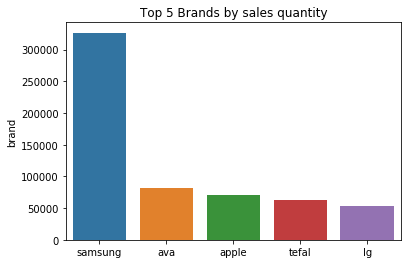

In [115]:
%matplotlib inline
import seaborn as sns
sns.barplot(x=Top_5_brands_by_sales_quantity.index,y=Top_5_brands_by_sales_quantity)
plt.title("Top 5 Brands by sales quantity")
#plt.savefig("Top 5 Brands by sales quantity.jpg",dpi=1000)
plt.show()

In [116]:
df["price"].groupby(df["brand"]).value_counts().sort_values(ascending=False).head(10)

brand    price 
samsung  138.87    30883
         115.72    24557
         104.14    23249
         208.31    14984
         300.90    13405
         162.01    11193
         173.59     9797
         254.61     9653
ava      11.55      8696
huawei   254.61     8636
Name: price, dtype: int64

In [117]:
Top_5_brands_by_Revenue=df["price"].groupby(df["brand"]).sum().sort_values(ascending=False).head()
print(Top_5_brands_by_Revenue)

brand
samsung    8.866376e+07
apple      4.737554e+07
lg         2.559450e+07
asus       1.059852e+07
huawei     1.048705e+07
Name: price, dtype: float64


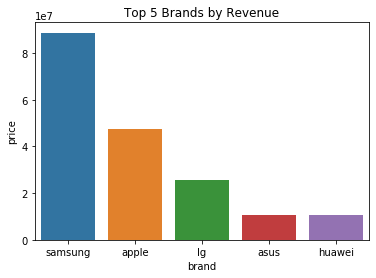

In [118]:
sns.barplot(x=Top_5_brands_by_Revenue.index,y=Top_5_brands_by_Revenue)
plt.title("Top 5 Brands by Revenue")
#plt.savefig("Top 5 Brands by Revenue.jpg",dpi=1000)
plt.show()

In [119]:
df["category_code"].value_counts().head()

electronics.smartphone              354747
appliances.kitchen.refrigerators     77008
computers.notebook                   71083
electronics.video.tv                 70979
appliances.environment.vacuum        65950
Name: category_code, dtype: int64

In [120]:

Top_5_smartphonebrand_sales=df["brand"][df["category_code"]=="electronics.smartphone"].value_counts().sort_values(ascending=False).head()
print(Top_5_smartphonebrand_sales)

samsung    177891
huawei      46344
apple       45589
oppo        35977
xiaomi      14208
Name: brand, dtype: int64


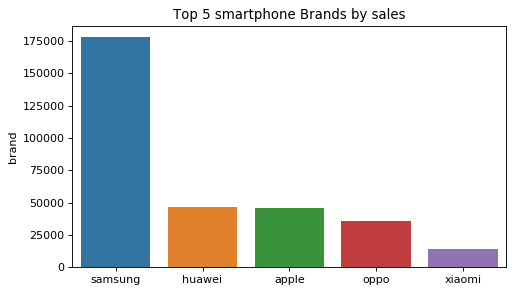

In [121]:
from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=80)
sns.barplot(Top_5_smartphonebrand_sales.index,Top_5_smartphonebrand_sales)
plt.title("Top 5 smartphone Brands by sales")
#plt.savefig("Top 5 smartphone Brands by sales.jpg",dpi=1000)
plt.show()

In [122]:
#smartphone_price=df[df["category_code"]=="electronics.smartphone"].groupby(df["price","brand"]).sum().head(10)
smartphone_price=df["price"][df["category_code"]=="electronics.smartphone"].groupby(df["brand"]).sum().sort_values(ascending=False).head()
print(smartphone_price)

brand
samsung    4.478705e+07
apple      3.502514e+07
huawei     9.696954e+06
oppo       7.247890e+06
xiaomi     2.660741e+06
Name: price, dtype: float64


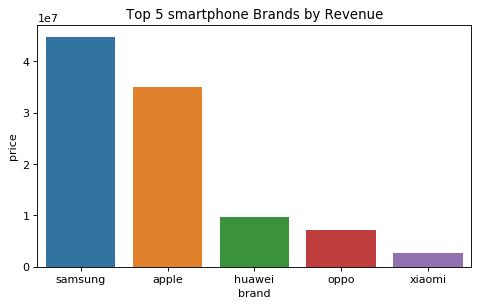

In [123]:
from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=80)
sns.barplot(smartphone_price.index,smartphone_price)
plt.title("Top 5 smartphone Brands by Revenue")
#plt.savefig("Top 5 smartphone Brands by Revenue.jpg",dpi=1000)
plt.show()

In [124]:
Top_5_computernotebook_sales=df["brand"][df["category_code"]=="computers.notebook"].value_counts().head()
print(Top_5_computernotebook_sales)

asus      18023
lenovo    17829
hp         6714
ipower     5604
apple      3904
Name: brand, dtype: int64


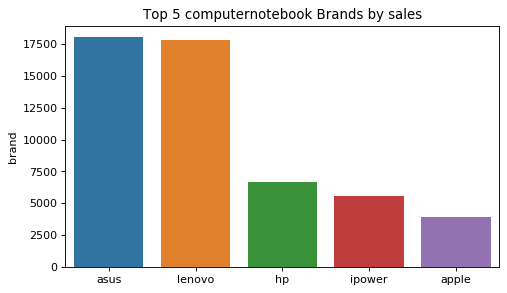

In [125]:
from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=80)
sns.barplot(Top_5_computernotebook_sales.index,Top_5_computernotebook_sales)
plt.title("Top 5 computernotebook Brands by sales")
#plt.savefig("Top 5 computernotebook Brands by sales.jpg",dpi=1000)
plt.show()

In [126]:
computernotebook_price=df["price"][df["category_code"]=="computers.notebook"].groupby(df["brand"]).sum().sort_values(ascending=False).head()
print(computernotebook_price)

brand
lenovo       1.022433e+07
asus         1.001263e+07
apple        5.441824e+06
hp           4.431505e+06
microsoft    3.716313e+05
Name: price, dtype: float64


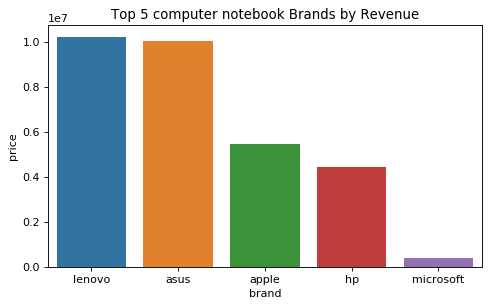

In [127]:
from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=80)
sns.barplot(computernotebook_price.index,computernotebook_price)
plt.title("Top 5 computer notebook Brands by Revenue")
#plt.savefig("Top 5 computer notebook Brands by Revenue.jpg",dpi=1000)
plt.show()

In [128]:
Top_5_videotvbrand_sales=df["brand"][df["category_code"]=="electronics.video.tv"].value_counts().head()
print(Top_5_videotvbrand_sales)


samsung    22481
lg         19086
ava         7172
tcl         4645
megogo      3827
Name: brand, dtype: int64


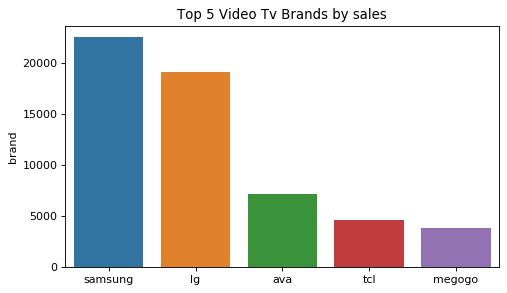

In [129]:
from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=80)
sns.barplot(Top_5_videotvbrand_sales.index,Top_5_videotvbrand_sales)
plt.title("Top 5 Video Tv Brands by sales")
#plt.savefig("Top 5 Video Tv Brands by sales.jpg",dpi=1000)
plt.show()

In [130]:
videoTv_price=df["price"][df["category_code"]=="electronics.video.tv"].groupby(df["brand"]).sum().sort_values(ascending=False).head()
print(videoTv_price)

brand
samsung    1.256110e+07
lg         1.042286e+07
sony       2.258290e+06
ava        1.324107e+06
tcl        1.156171e+06
Name: price, dtype: float64


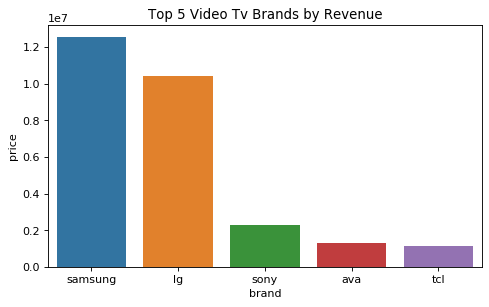

In [131]:
from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=80)
sns.barplot(videoTv_price.index,videoTv_price)
plt.title("Top 5 Video Tv Brands by Revenue")
#plt.savefig("Top 5 Video Tv Brands by Revenue.jpg",dpi=1000)
plt.show()

In [140]:
Top_5_videotvbrand_sales_dates=df["date"][df["category_code"]=="electronics.video.tv"].groupby([df["brand"]]).value_counts()
print(Top_5_videotvbrand_sales_dates)

brand   date      
aoc     2020-01-25    26
        2020-02-02    26
        2020-01-07    23
        2020-02-14    22
        2020-01-12    21
                      ..
xiaomi  2020-10-15     1
        2020-10-23     1
        2020-10-31     1
        2020-11-04     1
        2020-11-21     1
Name: date, Length: 3272, dtype: int64


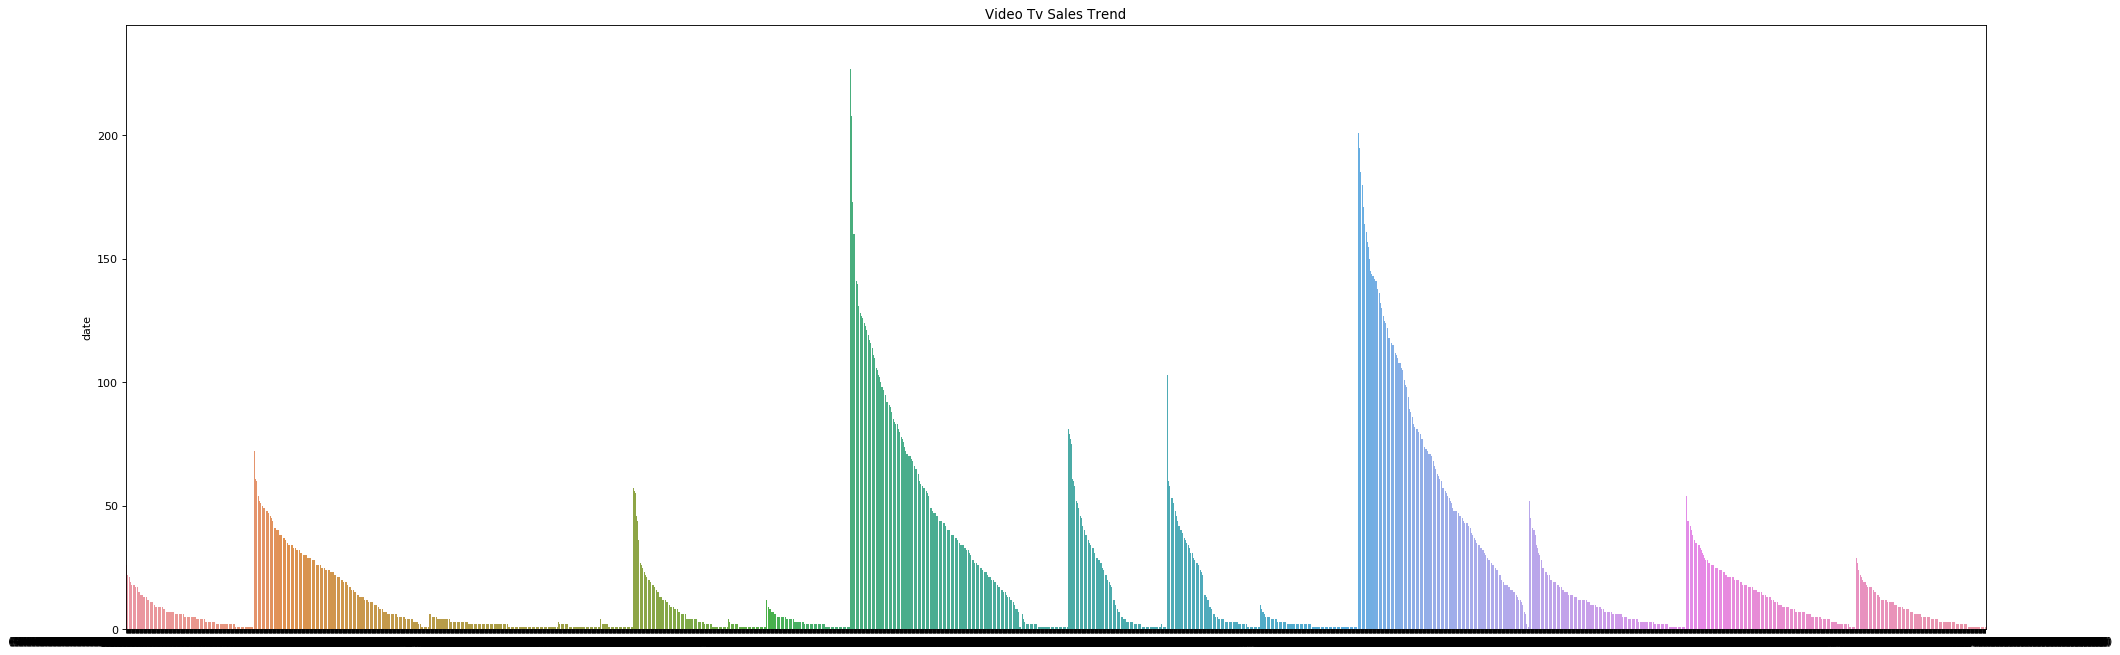

In [141]:
from matplotlib.pyplot import figure

figure(figsize=(30, 10), dpi=80)
sns.barplot(Top_5_videotvbrand_sales_dates.index,Top_5_videotvbrand_sales_dates)
plt.title("Video Tv Sales Trend")
#plt.savefig("Video Tv Sales Trend.jpg",dpi=1000)
plt.show()

In [142]:
Top_5_computernotebook_sales_dates=df["date"][df["category_code"]=="computers.notebook"].groupby(df["brand"]).value_counts()
print(Top_5_computernotebook_sales_dates)

brand      date      
alienware  2020-02-20    1
apc        2020-01-11    4
           2020-06-04    4
           2020-09-07    4
           2020-02-28    3
                        ..
vipe       2020-11-06    1
           2020-11-08    1
           2020-11-20    1
xiaomi     2020-01-24    1
           2020-08-20    1
Name: date, Length: 4996, dtype: int64


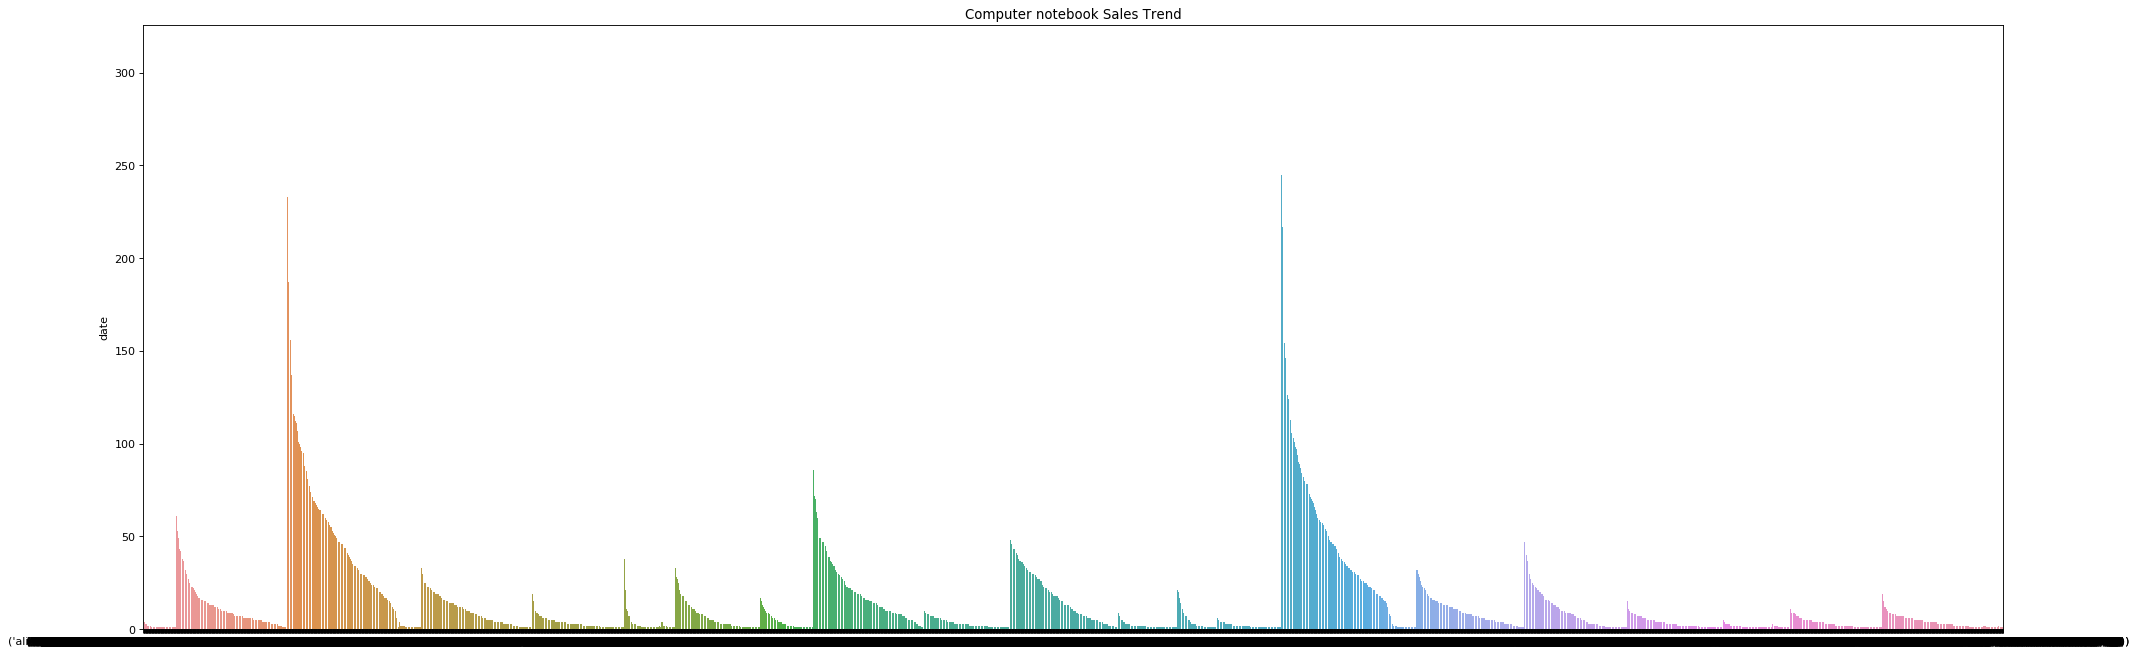

In [143]:
from matplotlib.pyplot import figure

figure(figsize=(30, 10), dpi=80)
sns.barplot(Top_5_computernotebook_sales_dates.index,Top_5_computernotebook_sales_dates)
plt.title("Computer notebook Sales Trend")
#plt.savefig("Computer notebook Sales Trend.jpg",dpi=1000)
plt.show()

In [158]:
Top_5_smartphone_sales_dates=df["date"][df["category_code"]=="electronics.smartphone"].groupby(df["brand"]).value_counts()
print(Top_5_smartphone_sales_dates)

brand    date      
adguard  2020-10-29      1
apple    2020-08-17    459
         2020-08-18    458
         2020-09-11    451
         2020-08-03    404
                      ... 
xiaomi   2020-04-29      5
         2020-05-03      5
         2020-05-04      5
         2020-04-26      4
         2020-04-28      3
Name: date, Length: 3173, dtype: int64


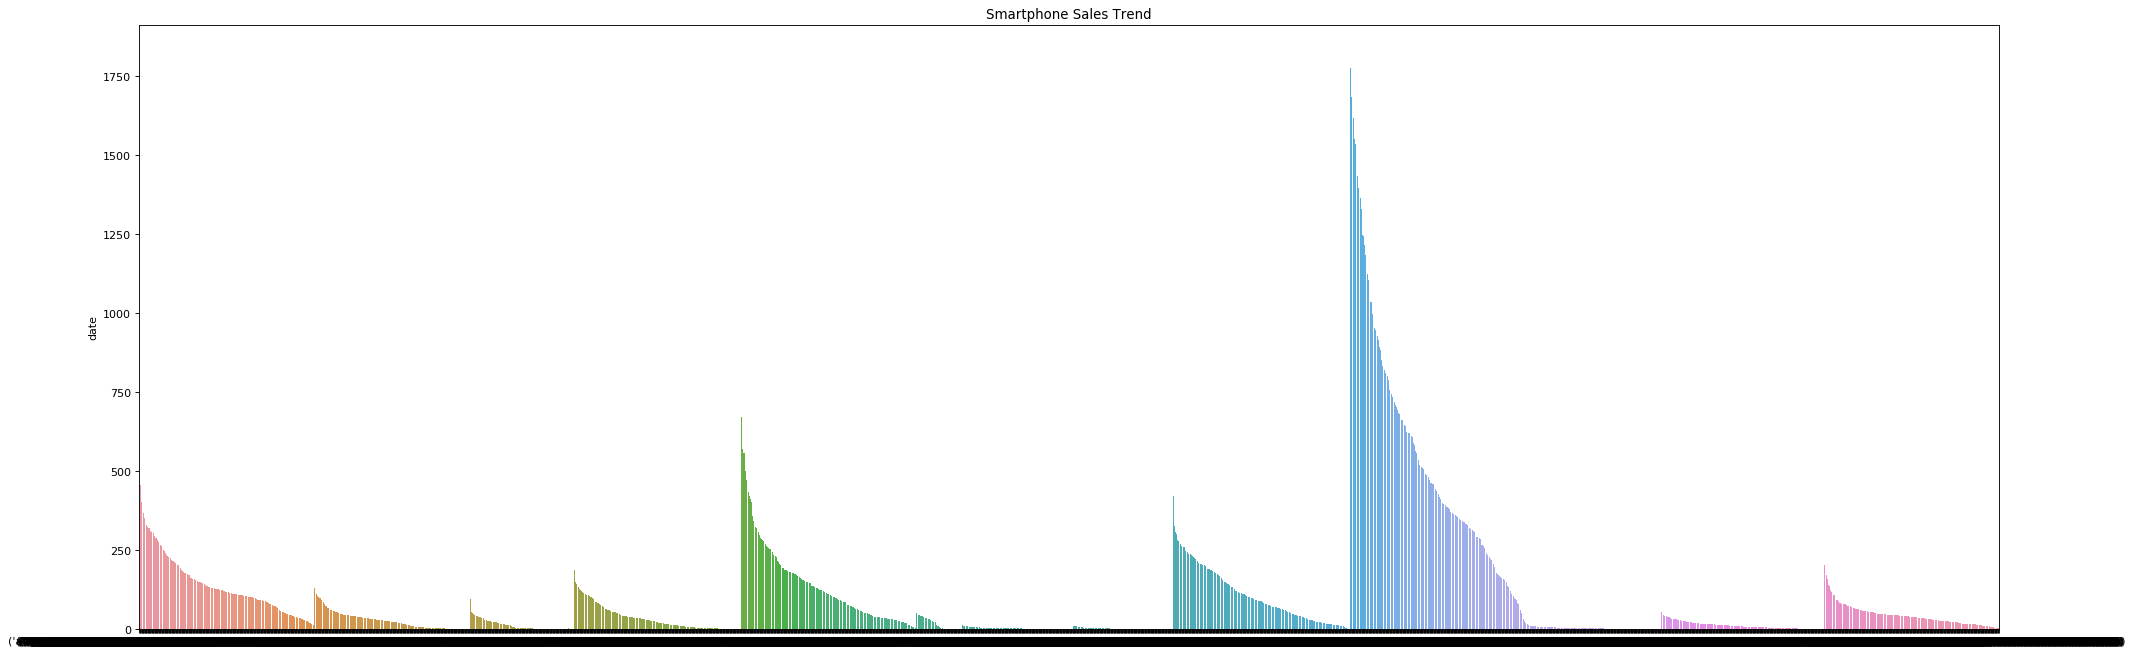

In [159]:
from matplotlib.pyplot import figure

figure(figsize=(30, 10), dpi=80)
sns.barplot(Top_5_smartphone_sales_dates.index,Top_5_smartphone_sales_dates)
plt.title("Smartphone Sales Trend")
#plt.savefig("Smartphone Sales Trend.jpg",dpi=1000)
plt.show()

In [198]:
covid1=pd.read_excel(r"C:\Users\MUHAMMADNOUMAN NAZIR\Desktop\covid11.xlsx")
covid1['date'] = pd.to_datetime(covid1['date'], format='%Y%m%d')#.dt.strftime('%d-%m-%Y')
covid1.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,helper
0,2020-01-22,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-22T24:00:00Z,0,0,0,0,0,0,0,e0caa1c66c4aa83baf227afe12261a1493fc0d7e,320
1,2020-01-23,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-23T24:00:00Z,0,0,0,0,0,0,1,e0563aac8e1bc7b8b8059c52831b97179ff6f981,319
2,2020-01-24,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-24T24:00:00Z,0,0,0,0,0,0,0,287531342bc8d5f2650b0cc12ebcca3807a64b7b,318
3,2020-01-25,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-25T24:00:00Z,0,0,0,0,0,0,0,9ea5731f5b0a79617b994d6842eecfdbeb1dde35,317
4,2020-01-26,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-26T24:00:00Z,0,0,0,0,0,0,0,69c67c81e64d10a5270497fc5336779c06fb812b,316


In [201]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=1000)
plt.plot(covid1["date"].index , covid1["positiveIncrease"])
plt.title("Daily Covid Cases")
#plt.savefig("Monthly cummulative Covid Cases.jpg",dpi=1000)
plt.show()

In [204]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=1000)
plt.plot(covid1["date"].index , np.cumsum(covid1["positiveIncrease"]))
plt.title("Daily cummulative Covid Cases")
#plt.savefig("Monthly cummulative Covid Cases.jpg",dpi=1000)
plt.show()

In [41]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=1000)
#[df["category_code"]=="computers.notebook"
Top_5_computernotebook_sales_dates=df["Date"].groupby(df["brand"]=="apple").count().plot()

print(Top_5_computernotebook_sales_dates)
#plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


In [37]:
y=df.groupby("df[brand]=="apple"","df["category_code"]=="computers.notebook"").value_counts()

SyntaxError: invalid syntax (<ipython-input-37-14bfcd63dc3e>, line 1)

In [38]:
x=df["date"]

plt.plot(x,y)

NameError: name 'y' is not defined

In [45]:
y=df[df["brand"]=="lg"][df["category_code"]=="electronics.smartphone"]

C:\Users\MUHAMMADNOUMAN NAZIR\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Samsung smartphone Sales')

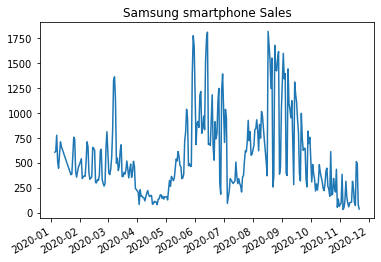

In [51]:
y1=df["date"][df["brand"]=="samsung"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("Samsung smartphone Sales")

Text(0.5, 1.0, 'Huawei smartphone Sales')

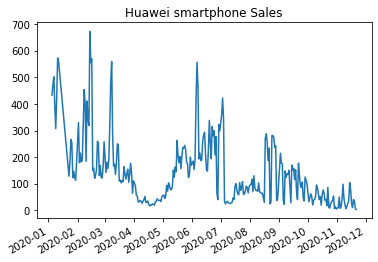

In [56]:
y2=df["date"][df["brand"]=="huawei"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("Huawei smartphone Sales")

Text(0.5, 1.0, 'apple smartphone Sales')

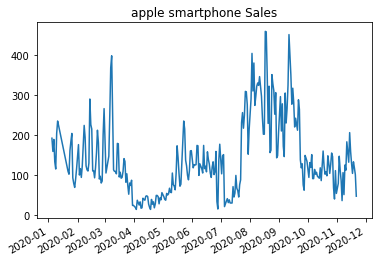

In [55]:
y3=df["date"][df["brand"]=="apple"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("apple smartphone Sales")

Text(0.5, 1.0, 'oppo smartphone Sales')

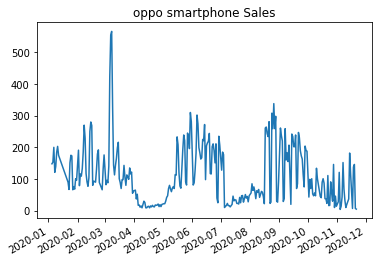

In [59]:
y4=df["date"][df["brand"]=="oppo"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("oppo smartphone Sales")

Text(0.5, 1.0, 'xiaomi smartphone Sales')

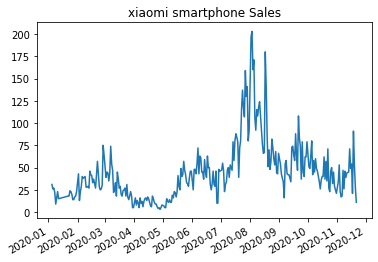

In [60]:
y5=df["date"][df["brand"]=="xiaomi"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("xiaomi smartphone Sales")

Text(0.5, 1.0, 'asus computernotebook Sales')

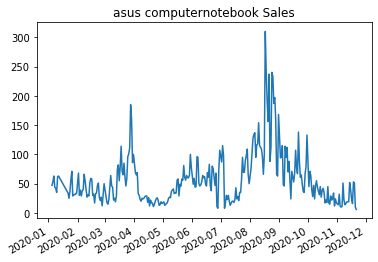

In [62]:
x1=df["date"][df["brand"]=="asus"][df["category_code"]=="computers.notebook"].value_counts().plot()
plt.title("asus computernotebook Sales")

Text(0.5, 1.0, 'lenovo computernotebook Sales')

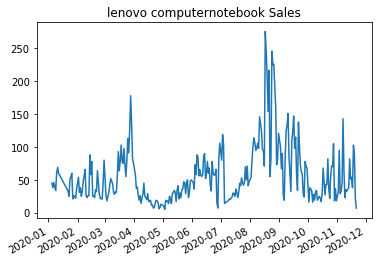

In [64]:
x2=df["date"][df["brand"]=="lenovo"][df["category_code"]=="computers.notebook"].value_counts().plot()
plt.title("lenovo computernotebook Sales")

Text(0.5, 1.0, ' hp computernotebook Sales')

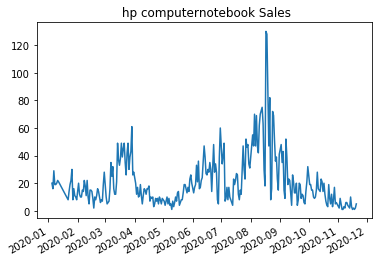

In [65]:
x3=df["date"][df["brand"]=="hp"][df["category_code"]=="computers.notebook"].value_counts().plot()
plt.title(" hp computernotebook Sales")

Text(0.5, 1.0, 'ipower computernotebook Sales')

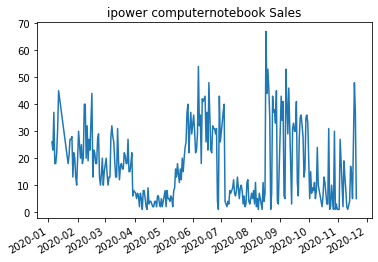

In [68]:
x4=df["date"][df["brand"]=="ipower"][df["category_code"]=="computers.notebook"].value_counts().plot()
plt.title("ipower computernotebook Sales")

Text(0.5, 1.0, 'apple computernotebook Sales')

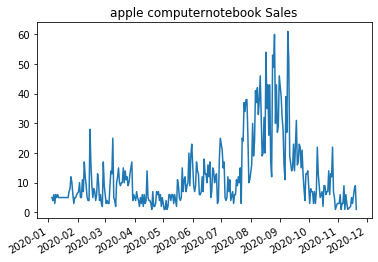

In [69]:
x5=df["date"][df["brand"]=="apple"][df["category_code"]=="computers.notebook"].value_counts().plot()
plt.title("apple computernotebook Sales")

Text(0.5, 1.0, 'samsung video tv Sales')

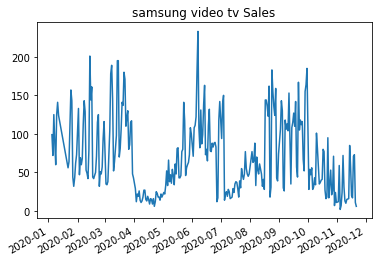

In [72]:
z1=df["date"][df["brand"]=="samsung"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("samsung video tv Sales")

Text(0.5, 1.0, 'lg video tv Sales')

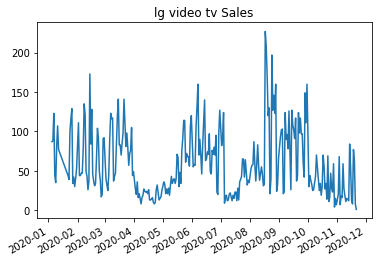

In [73]:
z2=df["date"][df["brand"]=="lg"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("lg video tv Sales")

Text(0.5, 1.0, 'sony video tv Sales')

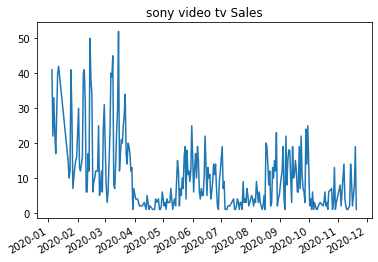

In [74]:
z3=df["date"][df["brand"]=="sony"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("sony video tv Sales")

Text(0.5, 1.0, 'ava video tv Sales')

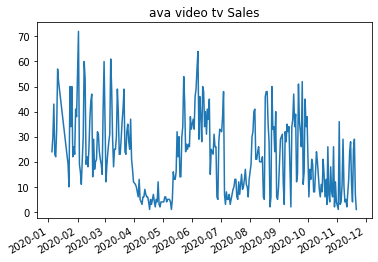

In [75]:
z4=df["date"][df["brand"]=="ava"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("ava video tv Sales")

Text(0.5, 1.0, 'tcl video tv Sales')

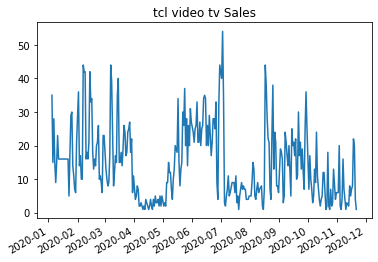

In [76]:
z1=df["date"][df["brand"]=="tcl"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("tcl video tv Sales")

Text(0.5, 1.0, 'video tv Sales')

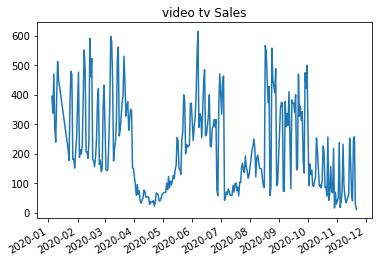

In [77]:
A1=df["date"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("video tv Sales")

Text(0.5, 1.0, 'computernotebook Sales')

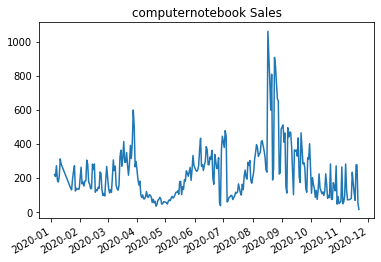

In [78]:
A2=df["date"][df["category_code"]=="computers.notebook"].value_counts().plot()
plt.title("computernotebook Sales")

Text(0.5, 1.0, 'smartphone Sales')

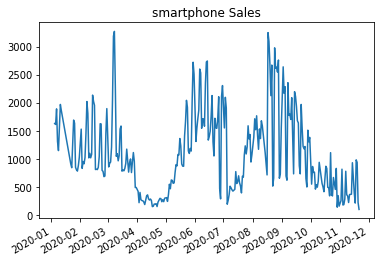

In [79]:
A3=df["date"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("smartphone Sales")

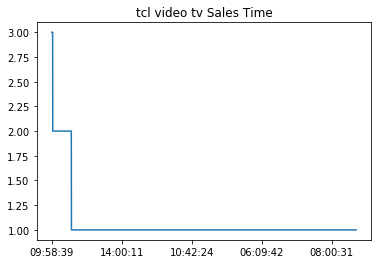

In [96]:
B1=df["Time"][df["brand"]=="tcl"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("tcl video tv Sales Time")
plt.savefig("tcl video tv Sales Time.jpg",dpi=1000)
plt.show()

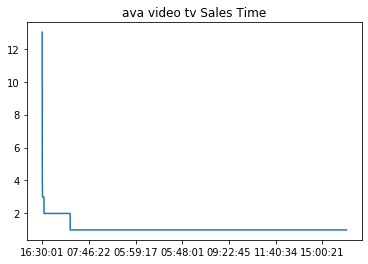

In [97]:
z4=df["Time"][df["brand"]=="ava"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("ava video tv Sales Time")
plt.savefig("ava video tv Sales Time.jpg",dpi=1000)
plt.show()

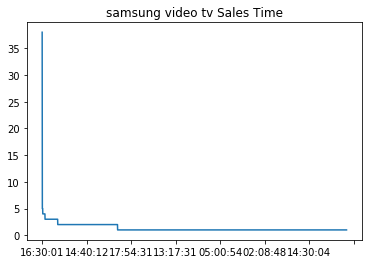

In [98]:
B3=df["Time"][df["brand"]=="samsung"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("samsung video tv Sales Time")
plt.savefig("samsung video tv Sales Time.jpg",dpi=1000)
plt.show()

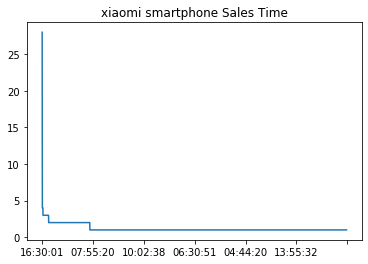

In [99]:
B4=df["Time"][df["brand"]=="xiaomi"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("xiaomi smartphone Sales Time")
plt.savefig("xiaomi smartphoneSales Time.jpg",dpi=1000)
plt.show()

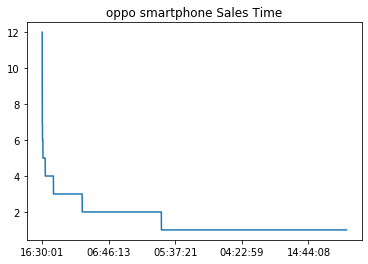

In [101]:

B5=df["Time"][df["brand"]=="oppo"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("oppo smartphone Sales Time")
plt.savefig("oppo smartphoneSales Time.jpg",dpi=1000)
plt.show()


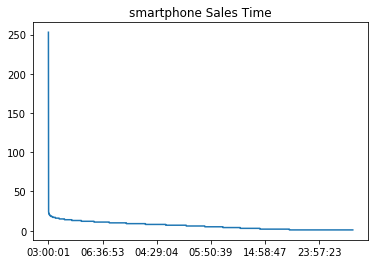

In [104]:
C1=df["Time"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("smartphone Sales Time")
plt.savefig("smartphoneSales Time.jpg",dpi=1000)
plt.show()

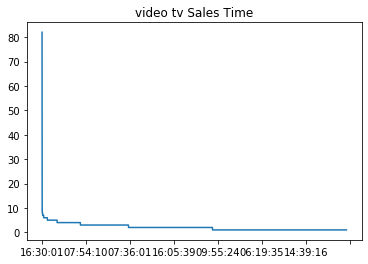

In [103]:
C2=df["Time"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("video tv Sales Time")
plt.savefig("video tv Sales Time.jpg",dpi=1000)
plt.show()

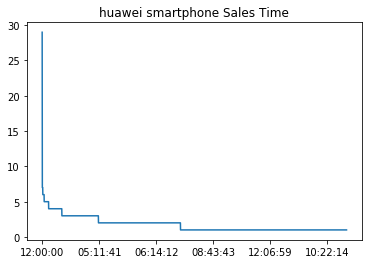

In [105]:
B5=df["Time"][df["brand"]=="huawei"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("huawei smartphone Sales Time")
plt.savefig("huawei smartphoneSales Time.jpg",dpi=1000)
plt.show()

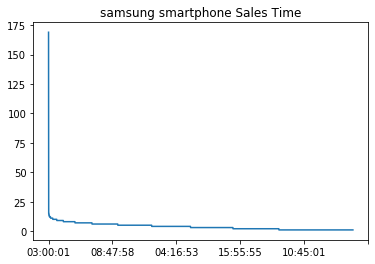

In [106]:
B5=df["Time"][df["brand"]=="samsung"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("samsung smartphone Sales Time")
plt.savefig("samsung smartphoneSales Time.jpg",dpi=1000)
plt.show()

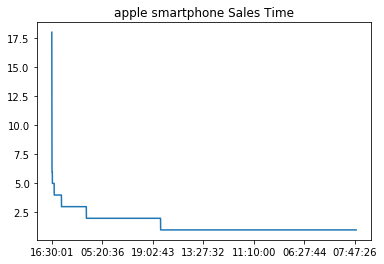

In [107]:
B7=df["Time"][df["brand"]=="apple"][df["category_code"]=="electronics.smartphone"].value_counts().plot()
plt.title("apple smartphone Sales Time")
plt.savefig("apple smartphoneSales Time.jpg",dpi=1000)
plt.show()

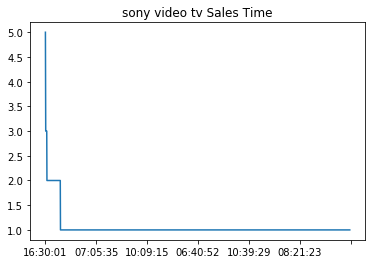

In [108]:
B8=df["Time"][df["brand"]=="sony"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("sony video tv Sales Time")
plt.savefig("sony video tv Sales Time.jpg",dpi=1000)
plt.show()

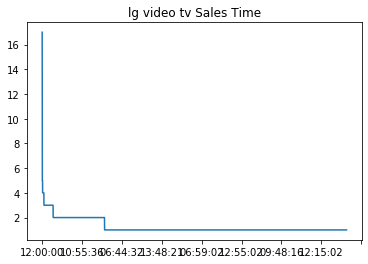

In [109]:
B9=df["Time"][df["brand"]=="lg"][df["category_code"]=="electronics.video.tv"].value_counts().plot()
plt.title("lg video tv Sales Time")
plt.savefig("lg video tv Sales Time.jpg",dpi=1000)
plt.show()